In [22]:
import os
import cv2
import glob
import numpy as np
import PIL
import collections

path, dirs, files = next(os.walk('train'))

print("There is")
print(len(files))
print("files in trains")

file_names = []
cat_images = []
dog_images = []

There is
25000
files in trains


In [23]:
filenames = os.listdir('train')

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

<function matplotlib.pyplot.show(close=None, block=None)>

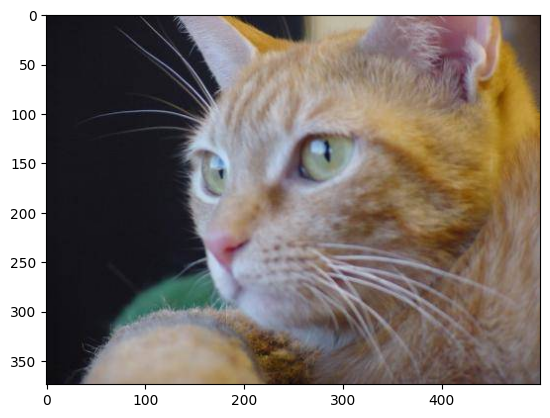

In [25]:
cat = mping.imread('train/cat.1044.jpg')
plt.imshow(cat)
plt.show

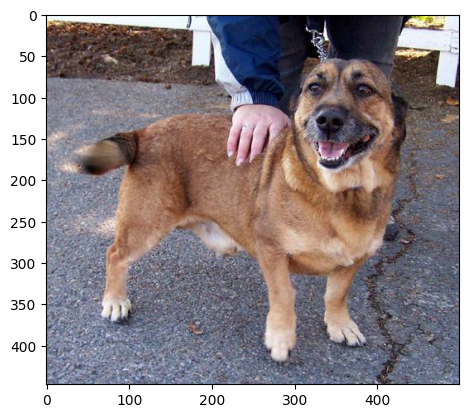

In [26]:
dog = mping.imread('train/dog.10035.jpg')
plt.imshow(dog)
plt.show()


In [27]:
dog_files = []
cat_files = []
labels = []

for file_name in file_names:
    if file_name.startswith('cat'):
        cat_files.append(file_name)

    elif file_name.startswith('dog'):
        dog_files.append(file_name)

print(len(dog_files))
print(len(cat_files))

0
0


In [28]:


# for file_name in file_names:
#     img = PIL.Image.open('train/' + file_name)
#     img = img.resize((224, 224))
#     img = img.convert('RGB')

#     img.save('resized/' + file_name)

In [29]:
file_names = os.listdir('resized')

In [30]:
user = int(input("How large is the dataset:"))
dog_cat_images = []
cat_images = 0
dog_images = 0

for file_name in file_names:
    if file_name.startswith('cat') and cat_images < user:
            dog_cat_images.append(cv2.imread('resized/' + file_name))
            cat_images += 1
            labels.append(0)
    if file_name.startswith('dog') and dog_images < user:
            dog_cat_images.append(cv2.imread('resized/' + file_name))
            dog_images += 1
            labels.append(1)

dog_cat_images = np.asarray(dog_cat_images)
print(len(dog_cat_images))
print(cat_images)
print(dog_images)
print(collections.Counter(labels))

20000
10000
10000
Counter({0: 10000, 1: 10000})


In [32]:

from sklearn.model_selection import train_test_split

labels = np.asarray(labels)

X_train, X_test, Y_train, Y_test = train_test_split(dog_cat_images, labels, test_size=0.2, random_state=2)

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [40]:
import tensorflow as tf
import tensorflow_hub as hub

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [34]:
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(2)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [35]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

model.fit(X_train_scaled, Y_train, epochs=5)


Epoch 1/5
500/500 [==============================] - 184s 350ms/step - loss: 0.0777 - acc: 0.9716
Epoch 2/5
500/500 [==============================] - 176s 352ms/step - loss: 0.0468 - acc: 0.9822
Epoch 3/5
500/500 [==============================] - 163s 325ms/step - loss: 0.0434 - acc: 0.9846
Epoch 4/5
500/500 [==============================] - 163s 326ms/step - loss: 0.0373 - acc: 0.9869
Epoch 5/5
500/500 [==============================] - 176s 352ms/step - loss: 0.0351 - acc: 0.9868


In [36]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy = ', acc)


125/125 [==============================] - 46s 350ms/step - loss: 0.0680 - acc: 0.9783
Test Loss = 0.06800984591245651
Test Accuracy =  0.9782500267028809


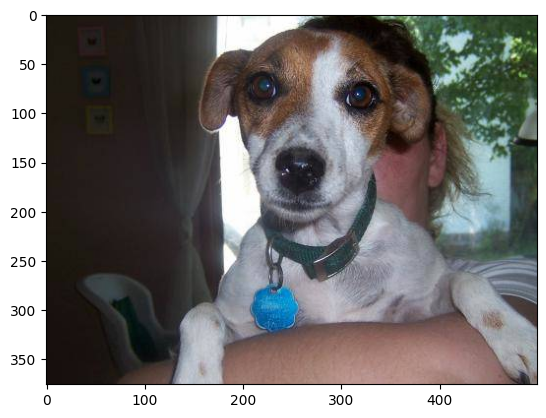

In [41]:
while True:
        image_number = input("Choose a file thats within 1 - 12500")
        try:
            test_image = mping.imread('test1/' + image_number + '.jpg')
        except:
            print("File not found, try again.")
        else:
            plt.imshow(test_image)
            plt.show()
            break

In [38]:
input_image = cv2.imread(f'test1/{image_number}.jpg')

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

1/1 [==============================] - 1s 817ms/step
[[ 3.2595603 -3.974046 ]]


In [39]:
cat_or_dog = np.argmax(input_prediction)

if cat_or_dog == 0:
    print("This is a cat")
elif cat_or_dog == 1:
    print("This is a dog")

This is a cat
